In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
# Define paths
train_dir = "dataset/train"
test_dir = "dataset/test"

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values
    rotation_range=30,      # Random rotation
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2, # Random vertical shift
    shear_range=0.2,        # Shearing
    zoom_range=0.2,         # Zooming
    horizontal_flip=True,   # Flip horizontally
    fill_mode='nearest'     # Fill missing pixels
)

# Preprocessing for testing data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the datasets
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [2]:
# Define paths
train_dir = "dataset/train"
test_dir = "dataset/test"

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize images
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and testing datasets
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # Binary classification: damaged or not
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [3]:
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(1, activation='sigmoid'))  # Binary classification (damaged or not)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


C:\Users\hamza\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Train the model
history = model.fit(
    train_data,
    epochs=20,
    validation_data=test_data
)


C:\Users\hamza\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 800ms/step - accuracy: 0.5112 - loss: 0.7590

C:\Users\hamza\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 54s 870ms/step - accuracy: 0.5117 - loss: 0.7580 - val_accuracy: 0.5630 - val_loss: 0.7499
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 77s 795ms/step - accuracy: 0.6365 - loss: 0.6656 - val_accuracy: 0.6391 - val_loss: 0.6483
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 46s 795ms/step - accuracy: 0.6760 - loss: 0.6183 - val_accuracy: 0.6630 - val_loss: 0.6240
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 46s 782ms/step - accuracy: 0.6609 - loss: 0.6148 - val_accuracy: 0.6587 - val_loss: 0.6265
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 45s 781ms/step - accuracy: 0.6971 - loss: 0.5887 - val_accuracy: 0.7043 - val_loss: 0.5664
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 46s 795ms/step - accuracy: 0.6927 - loss: 0.5753 - val_accuracy: 0.5674 - val_loss: 0.8576
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 48s 816ms/step - accuracy: 0.6910 - loss: 0.6015 - val_accuracy: 0.6609 - val_loss: 0.5827
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 46s 796ms/step - accuracy: 0.6975 - loss: 0.5841 - val_accuracy: 0.680

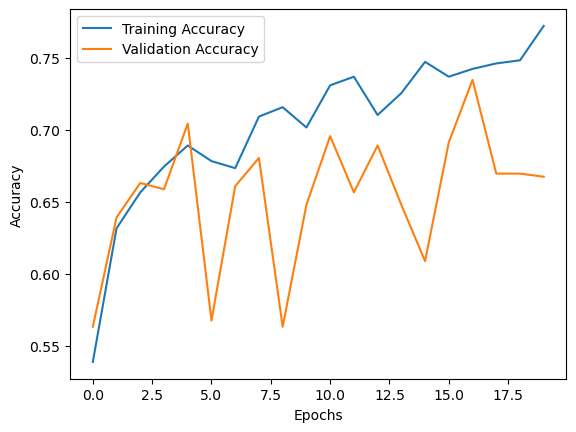

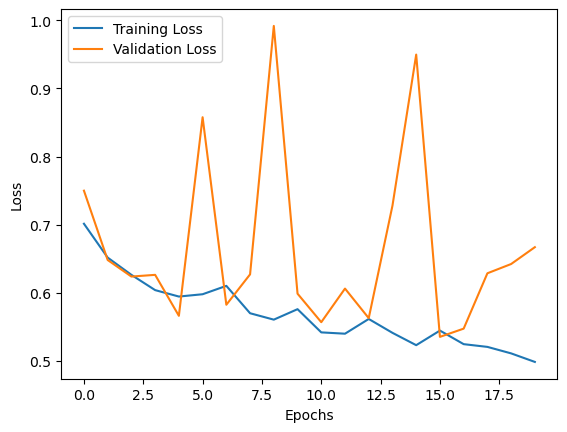

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 0.6861 - loss: 0.6387
Test Accuracy: 66.74%


In [6]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
The car is NOT damaged (Confidence: 89.71%)


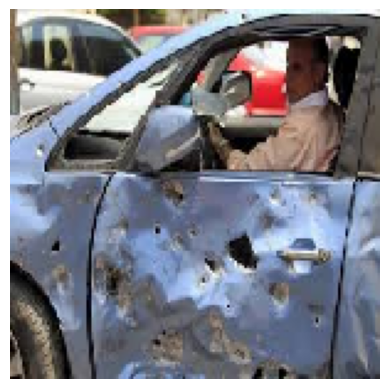

In [9]:
from tensorflow.keras.preprocessing import image

def predict_damage(img_path, model):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        print(f"The car is damaged (Confidence: {prediction[0][0]*100:.2f}%)")
    else:
        print(f"The car is NOT damaged (Confidence: {(1-prediction[0][0])*100:.2f}%)")
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Example usage
predict_damage('dataset/test/damaged/0010.JPEG', model)


In [10]:
# Save the model
model.save('car_damage_detection_model.h5')

# Load the model (for future use)
loaded_model = tf.keras.models.load_model('car_damage_detection_model.h5')


In [11]:
model.save('car_damage_detection_checkpoint.h5')


In [12]:
from tensorflow.keras.models import load_model
model = load_model('car_damage_detection_checkpoint.h5')


In [13]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001),  # Reduced learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [15]:
from tensorflow.keras.callbacks import Callback

# Custom Callback to Stop Training if Validation Accuracy Exceeds 0.95
class StopAtAccuracy(Callback):
    def __init__(self, accuracy_threshold=0.95):
        super(StopAtAccuracy, self).__init__()
        self.accuracy_threshold = accuracy_threshold

    def on_epoch_end(self, epoch, logs=None):
        val_accuracy = logs.get('val_accuracy')
        if val_accuracy and val_accuracy > self.accuracy_threshold:
            print(f"\nReached {self.accuracy_threshold * 100:.2f}% validation accuracy, stopping training.")
            self.model.stop_training = True

# Instantiate the StopAtAccuracy Callback
stop_at_accuracy = StopAtAccuracy(accuracy_threshold=0.90)

# Fine-Tuning the Model with 150 Epochs
history_fine_tuning = model.fit(
    train_data,
    epochs=50,  # Maximum number of epochs
    validation_data=test_data,
    callbacks=[stop_at_accuracy]
)


Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 46s 805ms/step - accuracy: 0.8158 - loss: 0.4161 - val_accuracy: 0.6870 - val_loss: 0.6642
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 46s 788ms/step - accuracy: 0.8087 - loss: 0.4330 - val_accuracy: 0.6522 - val_loss: 0.8121
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 46s 786ms/step - accuracy: 0.8108 - loss: 0.4284 - val_accuracy: 0.6978 - val_loss: 0.6524
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 83s 793ms/step - accuracy: 0.8116 - loss: 0.4165 - val_accuracy: 0.7000 - val_loss: 0.6648
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 47s 808ms/step - accuracy: 0.8102 - loss: 0.4154 - val_accuracy: 0.6957 - val_loss: 0.6814
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 46s 784ms/step - accuracy: 0.8221 - loss: 0.4108 - val_accuracy: 0.6848 - val_loss: 0.7051
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 52s 893ms/step - accuracy: 0.8257 - loss: 0.4039 - val_accuracy: 0.6630 - val_loss: 0.8030
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 46s 787ms/step - accuracy: 0.8027 - loss: 0.4328 - val_accu

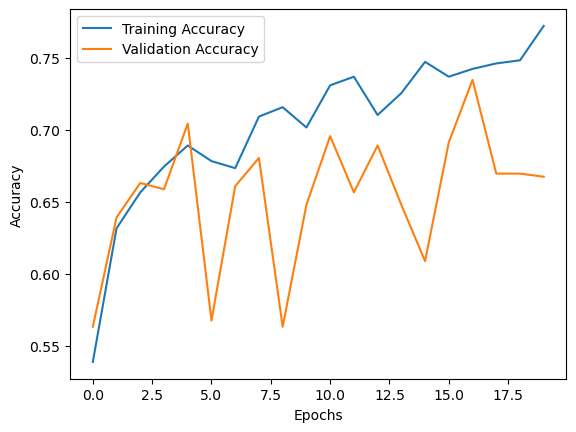

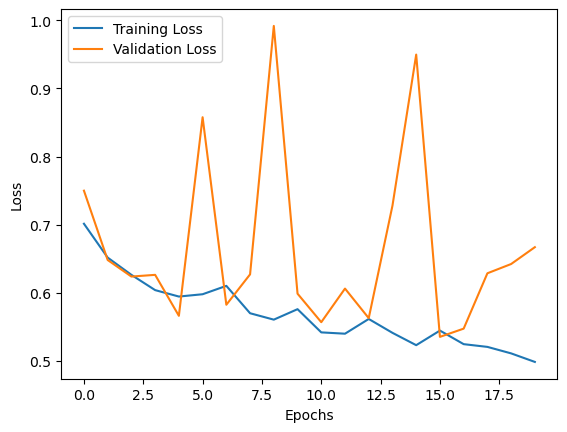

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - accuracy: 0.7419 - loss: 0.6267
Test Accuracy: 75.00%


In [16]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
The car is damaged (Confidence: 60.86%)


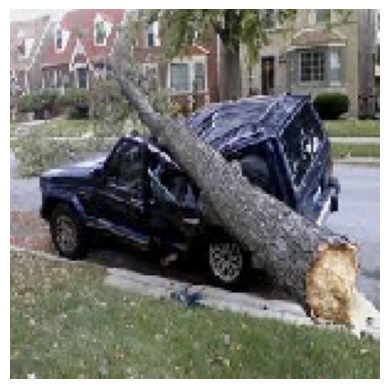

In [19]:
from tensorflow.keras.preprocessing import image

def predict_damage(img_path, model):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        print(f"The car is damaged (Confidence: {prediction[0][0]*100:.2f}%)")
    else:
        print(f"The car is NOT damaged (Confidence: {(1-prediction[0][0])*100:.2f}%)")
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Example usage
predict_damage('dataset/test/damaged/0001.JPEG', model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
The car is damaged (Confidence: 73.30%)


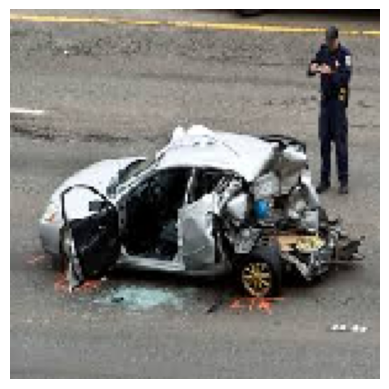

In [41]:
# Example usage
predict_damage('dataset/test/damaged/0004.JPEG', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
The car is damaged (Confidence: 83.72%)


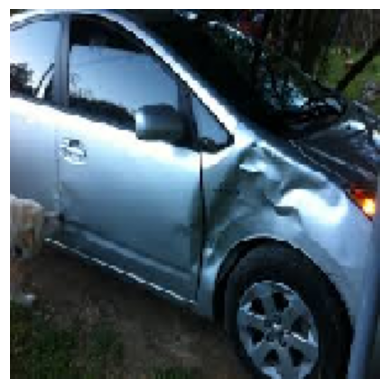

In [44]:
# Example usage
predict_damage('dataset/test/damaged/0015.JPEG', model)

In [45]:

# Save the model
model.save('car_damage_detection_model.h5')

# Load the model (for future use)
loaded_model = tf.keras.models.load_model('car_damage_detection_model.h5')